In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
nsmc_train_data=pd.read_table("data/nsmc/ratings_train.txt")
nsmc_test_data=pd.read_table("data/nsmc/ratings_test.txt")
kaggle_data=pd.read_table("data/kaggle/kr3.tsv")
nsmc_train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


<AxesSubplot:>

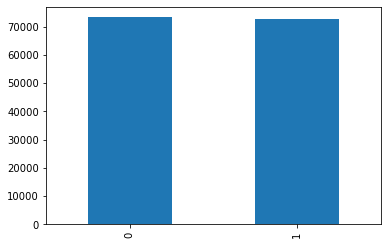

In [17]:
#네이버 영화 평점 데이터 라벨 분포(0:부정, 1:긍정)
nsmc_train_data['label'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

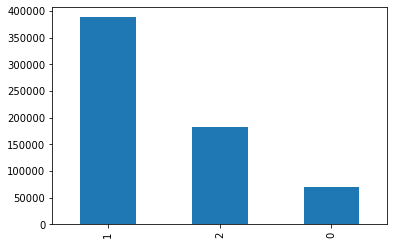

In [18]:
#kaggle 레스토랑 평점 데이터 라벨 분포(0:부정,1:긍정,2:모호함)
kaggle_data['Rating'].value_counts().plot(kind = 'bar')

In [15]:
#데이터 전처리, 중복과 null값 제거
nsmc_train_data.drop_duplicates(subset=['document'], inplace=True)
nsmc_train_data=nsmc_train_data.dropna(how='any')

In [19]:
#데이터 전처리, 한글과 공백 제외 전부 제거
nsmc_train_data['document'] = nsmc_train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


C:\Users\DESKTOP\anaconda3\envs\a2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
